In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import functions as fc

plt.rcParams["font.family"] = "Times New Roman"     # Font
plt.rcParams["font.size"] = 12                      # the size of the font
plt.rcParams["xtick.direction"] = "out"             
plt.rcParams["ytick.direction"] = "out"  
plt.rcParams["axes.linewidth"] = 1.0                # the width of the outside line
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
# Load data
dataset = pd.read_csv("all_properties_data.csv")
dataset.head()

,Ti,Nb,Al,Zr,Mo,Sn,Cr,stratify,Mo_Equiavalent,Mo_Equiavalent2,...,Root_Cold_Rolling_Rate,Homonization_Temperature,Homonization_Time,Solution_Treatment_Temperature,Solution_Treatment_Time,Beta_phase,"alpha""_phase",Elongation,UTS,References
0,80.0,20.0,0.0,0,0.0,0.0,0.0,a,0.127414,0.091477,...,9.746794,nd,nd,1173,1800,0,1,40.0,520.0,"Kim, Hee Young, et al. 2004. Materials Transac..."
1,78.0,22.0,0.0,0,0.0,0.0,0.0,a,0.137971,0.099056,...,9.746794,nd,nd,1173,1800,0,1,33.0,560.0,NaN
2,76.0,24.0,0.0,0,0.0,0.0,0.0,a,0.148203,0.106402,...,9.746794,nd,nd,1173,1800,1,1,24.0,455.0,NaN
3,74.0,26.0,0.0,0,0.0,0.0,0.0,a,0.158126,0.113526,...,9.746794,nd,nd,1173,1800,1,1,17.0,425.0,NaN
4,72.0,28.0,0.0,0,0.0,0.0,0.0,a,0.167753,0.120438,...,9.746794,nd,nd,1173,1800,1,0,10.0,525.0,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ti                              107 non-null    float64
 1   Nb                              107 non-null    float64
 2   Al                              107 non-null    float64
 3   Zr                              107 non-null    int64  
 4   Mo                              107 non-null    float64
 5   Sn                              107 non-null    float64
 6   Cr                              107 non-null    float64
 7   stratify                        107 non-null    object 
 8   Mo_Equiavalent                  107 non-null    float64
 9   Mo_Equiavalent2                 107 non-null    float64
 10  Atomic_Number                   107 non-null    float64
 11  e/a                             107 non-null    float64
 12  Average_Atom_Radius             107 

## Linear regression model for UTS

In [17]:
# Split data into x and y based on the feature selection
y = dataset[['UTS']]
X = dataset[['Ti', 'Mo_Equiavalent2', 'Delta', 'Electronegativity', 'Bo', 'Cold_Rolling_Rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = dataset['stratify'], test_size=0.2, random_state=2361)
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

r2_train, r2_test, MAE_test, MSE_test, RMSE_test = fc.model_evaluation(lm, X_train, X_test, y_train, y_test)

<ipython-input-19-f7a76710ff55>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


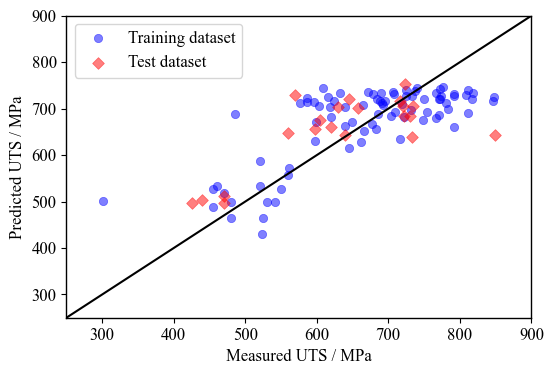

In [19]:
# Create a figure
x = np.linspace(250, 900)
y_diagonal = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1 = ax.plot(x, y_diagonal, c='black')
scatter2 = ax.scatter(y_train, predictions_train, c='blue', alpha=0.5, edgecolor='blue', linewidths=0.5, label='Training dataset')
scatter1 = ax.scatter(y_test, predictions_test, c='red',marker="D",alpha=0.5, edgecolor='red', linewidths=0.5, label='Test dataset')

ax.set_xlim(250, 900)
ax.set_ylim(250, 900)
ax.legend()
# ax.set_title('Predicted UTS (by LIN) vs. Measured UTS')
ax.set_xlabel('Measured UTS / MPa')
ax.set_ylabel('Predicted UTS / MPa')
# plt.savefig('regression_UTS.png', bbox_inches="tight", pad_inches=0.05)
fig.show()

## Linear regression model for Elongation

In [5]:
# Split data into x and y based on the feature selection
y = dataset[['Elongation']]
X = dataset[['Ti', 'Mo_Equiavalent2', 'Delta', 'Electronegativity', 'Bo', 'Cold_Rolling_Rate']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = dataset['stratify'], test_size=0.2, random_state=2361)
lm = LinearRegression()
lm.fit(X_train, y_train)

predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

r2_train, r2_test, MAE_test, MSE_test, RMSE_test = fc.model_evaluation(lm, X_train, X_test, y_train, y_test)

<ipython-input-6-f3d5b2b98f22>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


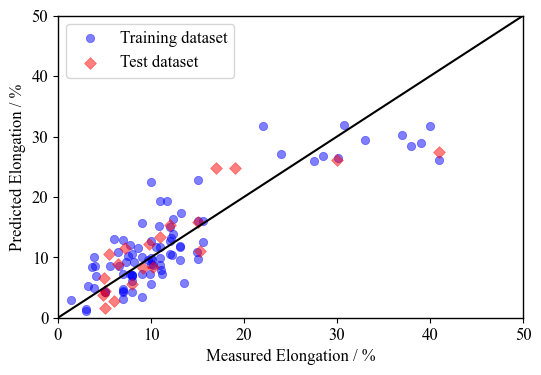

In [6]:
# Create a figure
x = np.linspace(0, 50)
y_diagonal = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1 = ax.plot(x, y_diagonal, c='black')
scatter2 = ax.scatter(y_train, predictions_train, c='blue', alpha=0.5, edgecolor='blue', linewidths=0.5, label='Training dataset')
scatter1 = ax.scatter(y_test, predictions_test, c='red',marker="D",alpha=0.5, edgecolor='red', linewidths=0.5, label='Test dataset')

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.legend()
# ax.set_title('Predicted Elongation (by LIN) vs. Measured Elongation')
ax.set_xlabel('Measured Elongation / %')
ax.set_ylabel('Predicted Elongation / %')
# plt.savefig('regression_elongation.png', bbox_inches="tight", pad_inches=0.05)
fig.show()